Explore Pre-Snap Metrics Data
==========================

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# open processed pre-snap data, confirm that shape looks correct
df_ptw1 = pd.read_csv("../data/processed/plays_and_targets_week_1.csv")
print(df_ptw1.shape)

(1906, 10)


In [33]:
#remove non-success values
df = df_ptw1[ df_ptw1["targetDiff"] != 0 ]

print(df.shape)
print(df.columns.values)

(1155, 10)
['gameId' 'playId' 'maxOffenseSpeed' 'maxDefenseSpeed'
 'offenseDistanceTraveled' 'defenseDistanceTraveled' 'elapsedTime'
 'offenseTarget' 'defenseTarget' 'targetDiff']


In [34]:
df_pp = pd.read_csv("../data/kaggle/plays.csv")
df = df.merge(df_pp, on=["gameId", "playId"])
print(df.shape)

(1155, 58)


In [35]:
off_dist    = df["offenseDistanceTraveled"].values
def_dist    = df["defenseDistanceTraveled"].values
target_diff = df["targetDiff"].values

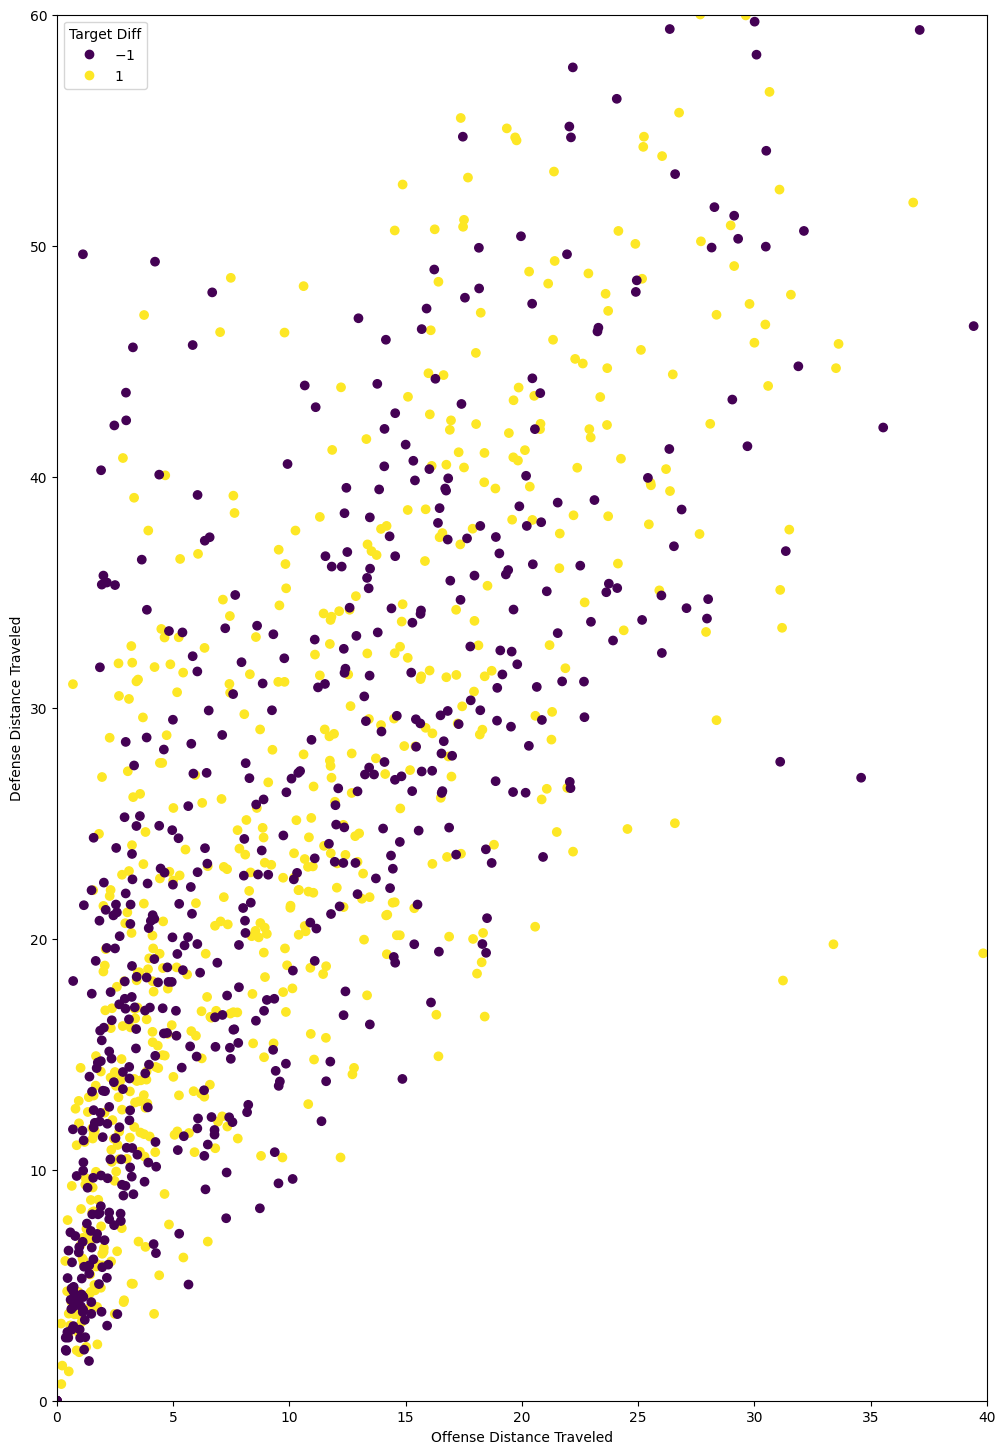

In [36]:
fig, ax = plt.subplots(figsize=(12,18))
scatter = ax.scatter(off_dist, def_dist, c=target_diff)
ax.set_xlabel("Offense Distance Traveled")
ax.set_ylabel("Defense Distance Traveled")

ax.set_xlim(0,40)
ax.set_ylim(0,60)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Target Diff")

plt.show()

In [37]:
print_fields = [ "gameId", "playId", "offenseDistanceTraveled", 
                 "defenseDistanceTraveled", "passResult" ]

In [38]:
# print offensive successes in the range of 33 to 40 yard offense distance traveled
df_top_offense_success = df[ ( df[ "offenseDistanceTraveled" ] <= 48 ) & \
                             ( df[ "offenseDistanceTraveled" ] >= 31.5 ) & \
                             ( df[ "targetDiff" ] == 1 ) ].copy()
df_top_offense_success.sort_values(by="offenseDistanceTraveled", inplace=True, ascending=False)
print(df_top_offense_success[print_fields].to_string(index=False))

    gameId  playId  offenseDistanceTraveled  defenseDistanceTraveled passResult
2022091104    2781                    45.35                    70.91        NaN
2022091106     130                    42.95                   110.92          C
2022091101    3591                    41.76                    65.56          C
2022091100    2114                    39.84                    19.37        NaN
2022091200    3723                    37.69                    78.50          C
2022091100     996                    37.64                    64.65        NaN
2022091101    3789                    36.83                    51.87          C
2022091100    2960                    33.62                    45.75          C
2022091107    1642                    33.51                    63.53          C
2022091104     462                    33.51                    44.70          R
2022091105    1589                    33.40                    19.76          C
2022091101    1980                    31

In [39]:
# print defensive successes in the range of 55 to 60 yard offense distance traveled
df_top_defense_success = df[ ( df[ "defenseDistanceTraveled" ] <= 65 ) & \
                             ( df[ "defenseDistanceTraveled" ] >= 57 ) & \
                             ( df[ "targetDiff" ] == -1 ) ].copy()
df_top_defense_success.sort_values(by="defenseDistanceTraveled", inplace=True, ascending=False)
print(df_top_defense_success[print_fields].to_string(index=False))


    gameId  playId  offenseDistanceTraveled  defenseDistanceTraveled passResult
2022091105    4794                    30.68                    64.22        NaN
2022091107     723                    30.90                    61.97        NaN
2022091105    4308                     3.30                    61.83          S
2022091101     708                    30.03                    60.49          I
2022091113    2983                    29.52                    60.24         IN
2022091112     508                    30.01                    59.70          S
2022091111    1567                    26.36                    59.38          S
2022091101    1537                    37.11                    59.34          I
2022091100     719                    46.44                    59.01          I
2022091104    2952                    30.09                    58.27          I
2022091102     488                    22.19                    57.72         IN
